In [1]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For time stamps
from datetime import datetime

# For division
from __future__ import division

/Users/jonathanbouchet/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Markov Chain
Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.
Let's start with a brief explanation of what we're going to do:
We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:

<b>ΔS/S=μΔt+σ*ϵ*sqrt(Δt)</b>

Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.
We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

<b>ΔS=S(μΔt+σ*ϵ*sqrt(Δt))</b>

Now we see that the change in the stock price is the current stock price multiplied by two terms. 
<ul>
<li>
The first term is known as "drift", which is the average daily return multiplied by the change of time. 
<li>The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. 
</ul>
By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be

In [18]:
# Set up our time horizon
days = 365
# Now our delta
dt = 1/days
# Now let's grab our mu (drift) from this quantity
mu = .01

# Now let's grab the volatility (= std()) 
sigma = .2

In [19]:
def simu_monte_carlo(start,days,mu,sigma):
    ''' This function takes in a starting values, days of simulation,mu,sigma, 
    and returns simulated simulated array'''
    
    # Define an initial array
    arr = np.zeros(days)
    arr[0] = start
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        arr[x] = arr[x-1] + (arr[x-1] * (drift[x] + shock[x]))
        
    return arr

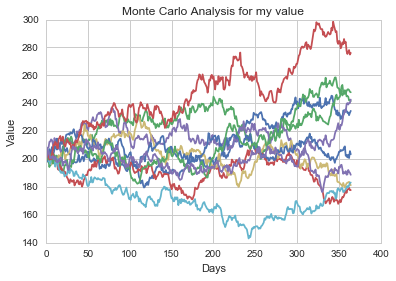

In [20]:
start = 200

for run in xrange(10):
    plt.plot(simu_monte_carlo(start,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Value")  
plt.title('Monte Carlo Analysis for my value')